In [50]:
#import libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import pylab as py 
#Extract numbers from the string
import re
# user for scalling and transforming data
from sklearn.preprocessing import StandardScaler ,PowerTransformer
# improted for QQ plot and charting option
import matplotlib.pyplot as plt
import seaborn as sns
## Used for creating dummy variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Split data into test and Train
from sklearn.model_selection import train_test_split
## Split into test and Train Data

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error






In [51]:
#creating dataframes
df = pd.read_excel('C:\\LTI\\Hackathon\\transport_master.xlsx')
df1 = pd.read_excel('C:\\LTI\\Hackathon\\transport_master.xlsx')

In [90]:
df=df1

In [91]:

Total=df.isnull().count().sort_values(ascending=True)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=True)
missing_data=pd.concat([Total,percent],axis=1 ,keys=['Total','percent'],sort='True')
print("\nPercentage of nulls after removing duplicates\n" ,missing_data)
##Query:- Is it wise to delete records with null constributing 22% Data as columns Credit Score 
##and Annual income are critical which can not be eliminated




Percentage of nulls after removing duplicates
                        Total   percent
CAR_TYPE              194274  0.573957
DAY_TYPE              194274  0.000000
DESCRIPTION           194274  0.000000
MAX_CAPACITY          194274  0.573957
NUMBER_OF_TICKETS     194274  0.573957
PT_CODE               194274  0.000000
PT_TYPE               194274  0.000000
RIDE_ID               194274  0.573957
ROADNAME              194274  0.000000
ROUTE_ID              194274  0.000000
SEQ_NO                194274  0.000000
TIME_PER_HOUR         194274  0.000000
TOTAL_TAP_IN_VOLUME   194274  0.000000
TOTAL_TAP_OUT_VOLUME  194274  0.000000
TRAVEL_DATE           194274  0.573957
TRAVEL_FROM           194274  0.573957
TRAVEL_TIME           194274  0.573957


In [92]:
#Drop records having null ride_id
df_final=df.drop(df.loc[df['RIDE_ID'].isnull()].index)


In [93]:
#drop unwanted columns
df_final=df_final.drop(columns=["RIDE_ID" ,"TRAVEL_TIME","SEQ_NO","TRAVEL_FROM","DESCRIPTION","TRAVEL_FROM","PT_TYPE","ROADNAME","CAR_TYPE"])

# rectify years in current job

In [94]:
#Standardize
dummy=pd.get_dummies(df_final.DAY_TYPE, prefix='TYPE')

In [95]:
df_final=pd.concat([dummy,df_final],axis=1)

In [97]:
df_final.head(5)

,TYPE_WEEKDAY,TYPE_WEEKENDS/HOLIDAY,DAY_TYPE,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,ROUTE_ID,TRAVEL_DATE,MAX_CAPACITY,NUMBER_OF_TICKETS
1,1,0,WEEKDAY,9,14211,58,314,8127,2013-02-18,11.0,9.0
9,1,0,WEEKDAY,16,14211,915,245,10211,2010-02-18,11.0,1.0
12,1,0,WEEKDAY,10,14211,71,153,7877,2020-12-17,49.0,3.0
19,1,0,WEEKDAY,16,76201,698,420,12218,2014-03-18,49.0,4.0
20,1,0,WEEKDAY,21,76201,252,253,8420,2009-02-18,11.0,9.0


In [106]:
df_final=df_final.drop(columns=["DAY_TYPE"])

KeyError: "['DAY_TYPE'] not found in axis"

In [107]:
df_final=df_final.drop(columns=["PT_CODE"])

In [101]:
df_final['Weekofday']=df_final['TRAVEL_DATE'].dt.dayofweek

In [120]:
df_final=df_final.drop(columns=["TRAVEL_DATE"])

KeyError: "['TRAVEL_DATE'] not found in axis"

In [121]:
df_final=df_final.drop(columns=["ROUTE_ID"])

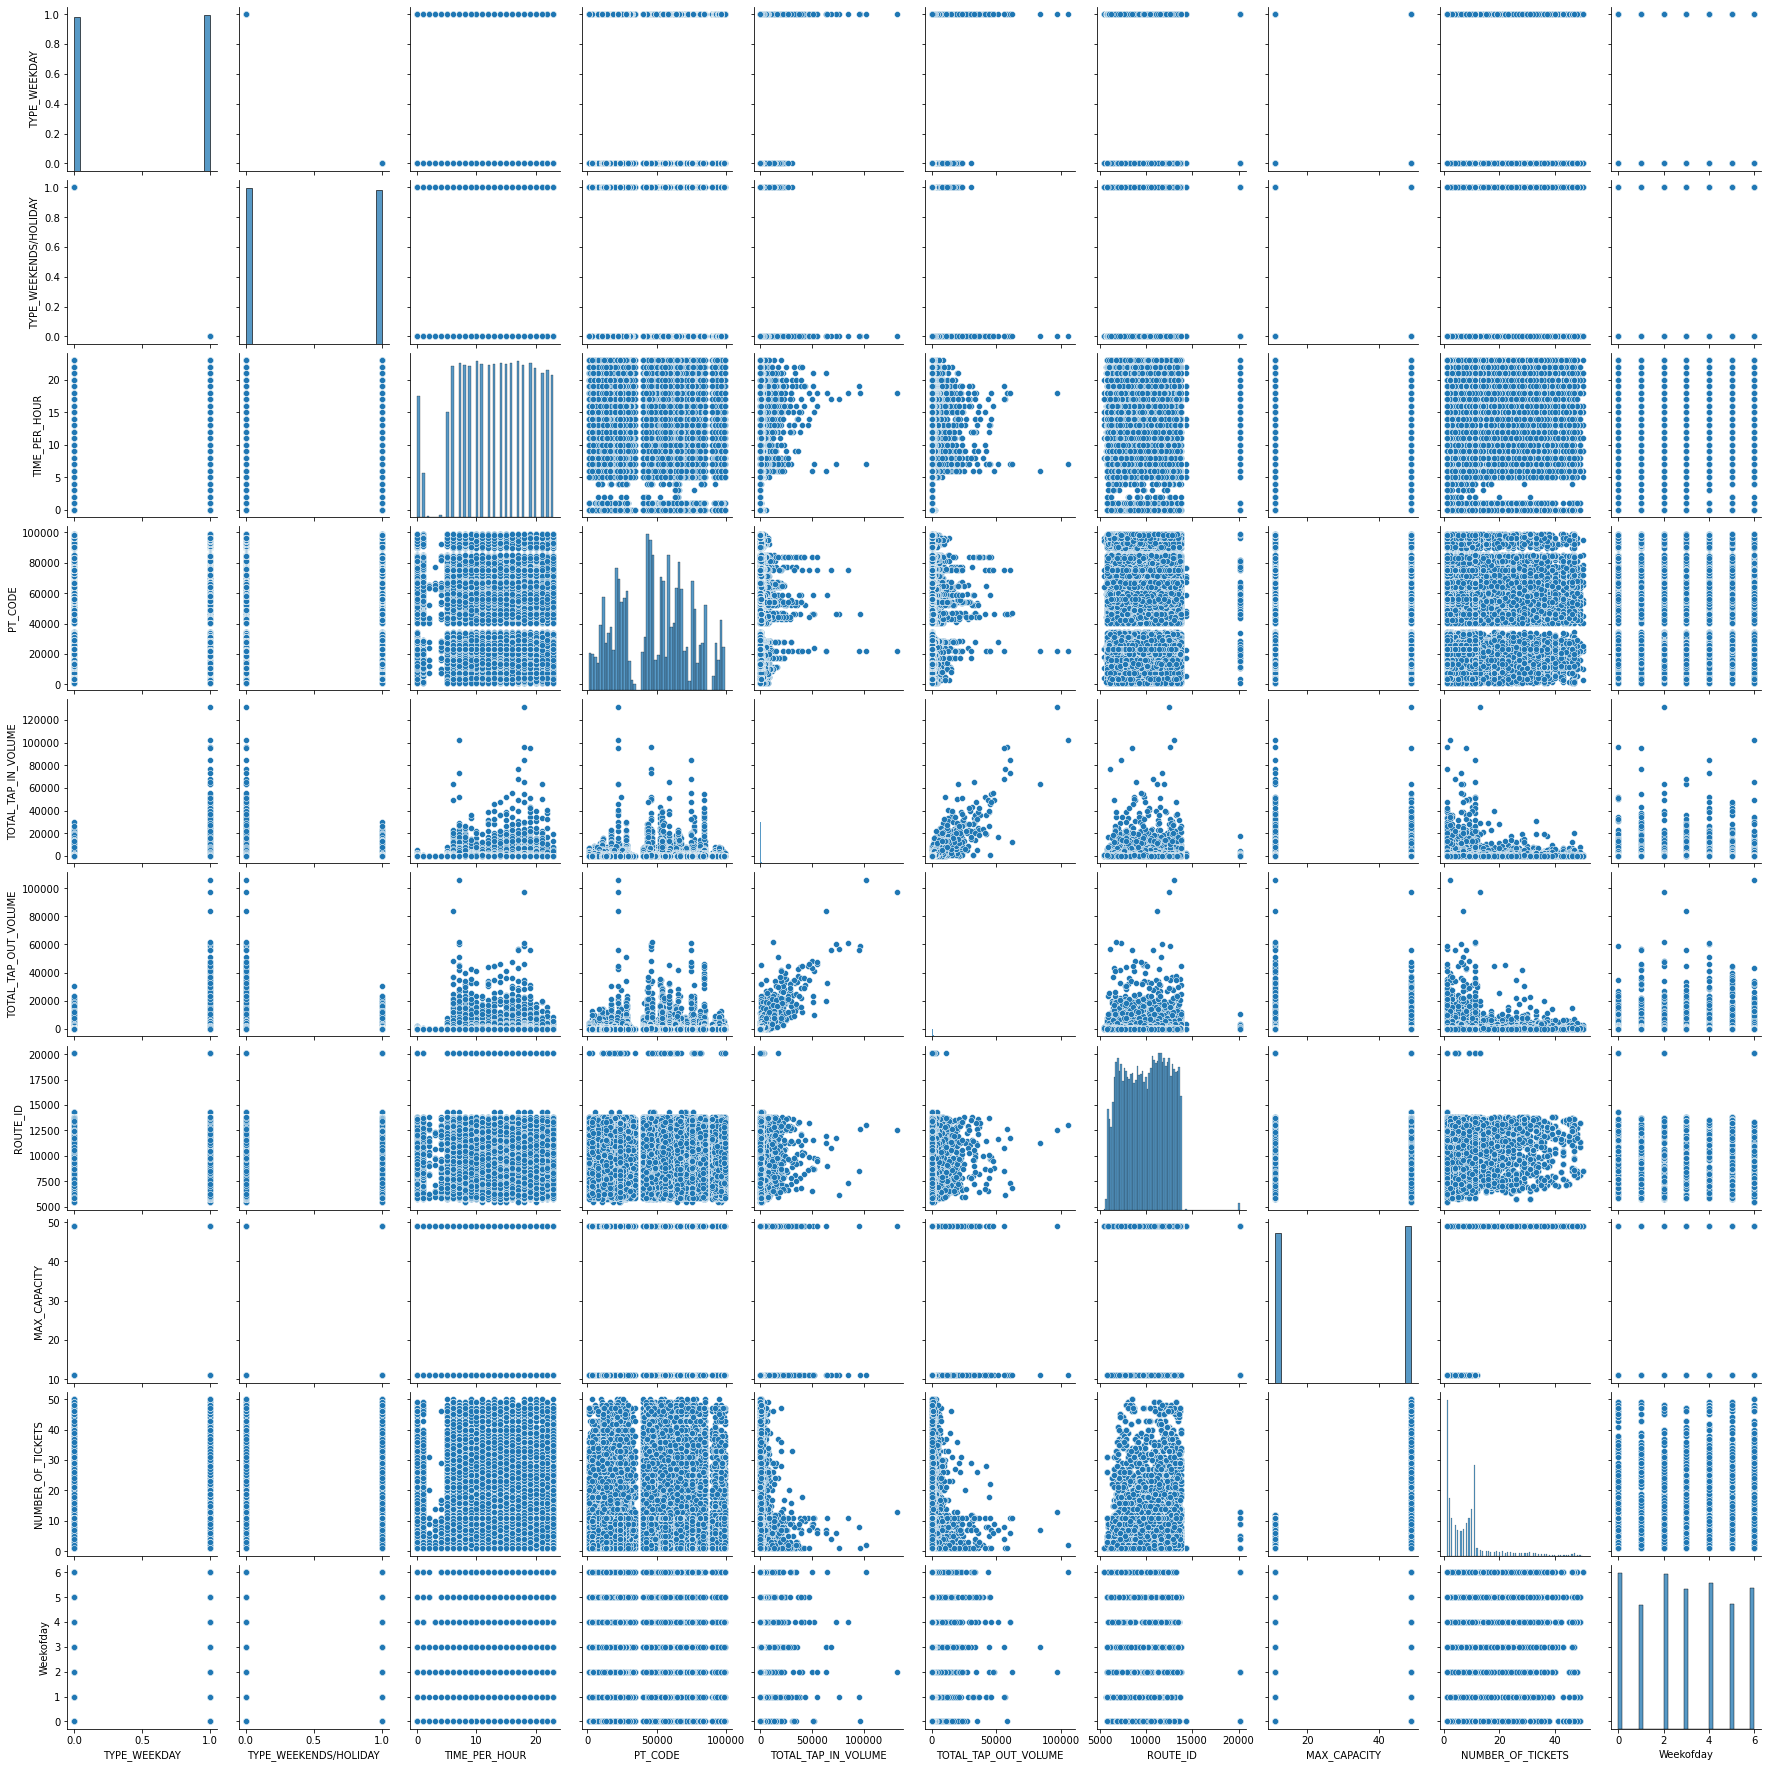

In [104]:
#check correlation
sns.pairplot(df_final)

In [122]:
df_final.head(5)

,TYPE_WEEKDAY,TYPE_WEEKENDS/HOLIDAY,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,MAX_CAPACITY,NUMBER_OF_TICKETS,Weekofday
1,1,0,9,58,314,11.0,9.0,0
9,1,0,16,915,245,11.0,1.0,3
12,1,0,10,71,153,49.0,3.0,3
19,1,0,16,698,420,49.0,4.0,1
20,1,0,21,252,253,11.0,9.0,2


In [126]:
#weekday = df_final[df_final['DAY_TYPE']=='WEEKDAY']
#weekend = df_final[df_final['DAY_TYPE']!='WEEKDAY']




In [127]:
dummy1=pd.get_dummies(df_final.Weekofday, prefix='week_no')

In [129]:
df_final=pd.concat([dummy1,df_final],axis=1)

In [131]:
df_final=df_final.drop(columns=["Weekofday"])

In [132]:
train, test = train_test_split(df_final, test_size=0.2,random_state =30)
#weekend_train, weekend_test = train_test_split(weekend, test_size=0.2,random_state =30)

In [133]:
X = train.drop(["NUMBER_OF_TICKETS"], axis=1)
y = train.NUMBER_OF_TICKETS

In [135]:
X

,week_no_0,week_no_1,week_no_2,week_no_3,week_no_4,week_no_5,week_no_6,TYPE_WEEKDAY,TYPE_WEEKENDS/HOLIDAY,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,MAX_CAPACITY
36964,0,0,0,0,0,1,0,0,1,15,0,1,49.0
148769,0,0,1,0,0,0,0,0,1,9,851,696,11.0
124502,0,1,0,0,0,0,0,1,0,19,376,91,49.0
94214,0,0,0,1,0,0,0,0,1,17,40,4,49.0
129474,1,0,0,0,0,0,0,0,1,9,206,293,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155783,0,0,0,0,0,0,1,1,0,21,169,380,49.0
108083,1,0,0,0,0,0,0,0,1,10,363,241,49.0
112376,0,0,1,0,0,0,0,0,1,18,137,79,49.0
164367,1,0,0,0,0,0,0,0,1,16,14,2,49.0


In [136]:
model = RandomForestRegressor(n_estimators=100, criterion="mae", n_jobs=-1)
model.fit(X,y)

RandomForestRegressor(criterion='mae', n_jobs=-1)

In [137]:
preds_train_set = model.predict(X)

In [138]:
print (mean_absolute_error(preds_train_set,y))

2.6965957109416294


In [141]:
x_test = test.drop(["NUMBER_OF_TICKETS"], axis=1)

In [142]:
test_set_predictions = model.predict(x_test)

In [144]:
test_set_predictions

array([ 6.735,  6.07 , 10.2  , ..., 13.29 , 12.8  ,  6.16 ])

In [153]:
df_test_set=test

In [155]:
d = {'TYPE_WEEKDAY': df_test_set["TYPE_WEEKDAY"], 'number_of_ticket': test_set_predictions}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[['TYPE_WEEKDAY','number_of_ticket']]

In [152]:
df_predictions.head()

,ride_id,number_of_ticket
28867,1,6.735
90350,0,6.070
168791,0,10.200
80402,0,7.860
84304,1,7.750


In [161]:
import pickle


In [163]:

Pkl_Filename = "Pickle_RL_Model.pkl" 

In [164]:
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# Load the Model back from file
#with open(Pkl_Filename, 'rb') as file:  
    #Pickled_LR_Model = pickle.load(file)

#Pickled_LR_Model